<h1>교차검증</h1>

<h2>교차검증의 의미</h2>
<h3>오버피팅</h3>
학습데이터와 테스트 데이터로 나눠서 학습을 진행할 때, 훈련 데이터로만 만들어진
훈련 횟수가 너무 많아 결과적으로 훈련 데이터에 대한 모델이 정확성이 너무 높아서 테스트 데이터를 예측하지 못하는 현상
<br>-> 학습 횟수를 줄이는 방식으로 오버피팅을 방지 할 수 있겠지만 다른 방법은?</br>
1.학습 데이터 세트 자체에 대해서 학습 데이터 세트와 검증 데이터 세트로 분할하여 
반복학습을 하되 반복마다 계속 학습 데이터 자체를 학습,검증 세트로 나눠서 훈련한다.
이 과정을 통해서 오버피팅의 확률을 줄인다
<h3>=교차검증</h3>
<br>교차 검증 후에 최종적으로 테스트 데이터로 확인한다</br>


<h2>교차검증의 종류</h2>
<h3>K-fold 교차 검증</h3>
return과 yeields차이: 참고만 

In [1]:
from sklearn.tree import DecisionTreeClassifier #sklearn라이브러리의 tree 모듈에서 DecisionTreeClassifier 호출
from sklearn.metrics import accuracy_score #정확도를 측정하는 함수 호출
from sklearn.model_selection import KFold
from sklearn.datasets import load_iris
import numpy as np
import pandas as pd

# class sklearn.model_selection.KFold(n_splits=5, *, shuffle=False, random_state=None)

iris = load_iris()
features = iris.data
label = iris.target
dt_clf = DecisionTreeClassifier(random_state=156) 
#


kfold = KFold(n_splits=5)
cv_accuracy = []

print('불꽃 데이터 세트 크기:',features.shape[0]) #.shape: numpy형식 데이터의 각각의 차원의 크기를 ndarray 형식으로 출력하는 함수
#여기서는 단순히 행 개수만 알면 되기에 [0]으로 행 차원의 개수를 출력한다.


불꽃 데이터 세트 크기: 150


In [2]:
n_iter = 0
kfold.split(features)
# kfold 내에서 데이터들을 train_index와 test_index로 구분되는 ndarray 데이터로 출력한다.

kfold.split

<bound method _BaseKFold.split of KFold(n_splits=5, random_state=None, shuffle=False)>

In [3]:
for train_index , test_index in kfold.split(features):
    X_train, X_test = features[train_index], features[test_index]
    y_train, y_test = label[train_index], label[test_index]
    # print(features[30])

    dt_clf.fit(X_train, y_train)
    pred = dt_clf.predict(X_test)
    n_iter += 1

    accuracy = np.round(accuracy_score(y_test,pred))
    train_size = X_train.shape[0]
    test_size = X_test.shape[0]

    print(f'#{n_iter} 교차 검증 정확도 {accuracy}, 학습데이터 크기:{train_size}, 검증데이터 크기:{test_size}')
    print(f'#{n_iter} 검증 세트 인덱스{test_index}')

    cv_accuracy.append(accuracy)

print(f'\n 평균 검증 정확도 {np.mean(cv_accuracy)}')

#어떻게 모델의 적정성을 이걸로 판단하나? 정확도로 적정성 파악 못한다면서
#->kfold

#1 교차 검증 정확도 1.0, 학습데이터 크기:120, 검증데이터 크기:30
#1 검증 세트 인덱스[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23
 24 25 26 27 28 29]
#2 교차 검증 정확도 1.0, 학습데이터 크기:120, 검증데이터 크기:30
#2 검증 세트 인덱스[30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 51 52 53
 54 55 56 57 58 59]
#3 교차 검증 정확도 1.0, 학습데이터 크기:120, 검증데이터 크기:30
#3 검증 세트 인덱스[60 61 62 63 64 65 66 67 68 69 70 71 72 73 74 75 76 77 78 79 80 81 82 83
 84 85 86 87 88 89]
#4 교차 검증 정확도 1.0, 학습데이터 크기:120, 검증데이터 크기:30
#4 검증 세트 인덱스[ 90  91  92  93  94  95  96  97  98  99 100 101 102 103 104 105 106 107
 108 109 110 111 112 113 114 115 116 117 118 119]
#5 교차 검증 정확도 1.0, 학습데이터 크기:120, 검증데이터 크기:30
#5 검증 세트 인덱스[120 121 122 123 124 125 126 127 128 129 130 131 132 133 134 135 136 137
 138 139 140 141 142 143 144 145 146 147 148 149]

 평균 검증 정확도 1.0


sklearn.model_selection.StratifiedKFold
class sklearn.model_selection.StratifiedKFold(n_splits=5, *, shuffle=False, random_state=None)[source]

In [4]:
#kfold의 문제점: 편향된 데이터의 경우 검증이 어렵다. ->예시사항
from sklearn.datasets import load_iris
import pandas as pd

iris = load_iris()
iris.keys()
iris_df = pd.DataFrame(data=iris.data, columns=iris.feature_names)
iris_df['label']=iris.target
iris_df


kfold = KFold(n_splits=3)

n_iter=0
for train_index, test_index in kfold.split(train_index, ):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    label_test = iris_df['label'].iloc[train_index]
    print(f'##교차검증:{n_iter}')
    print('학습 레이블 데이터 분포:',label_train.value_counts())
    print('검증 레이블 데이터 분포:', label_test.value_counts())

#이 경우 학습 데이터와 검증 데이터가 전혀 겹쳐지지 않기 때문에 해당 
#분류로 모델을 만들면 상당히 검증이 어렵다.



##교차검증:1
학습 레이블 데이터 분포: 1    50
2    20
0    10
Name: label, dtype: int64
검증 레이블 데이터 분포: 1    50
2    20
0    10
Name: label, dtype: int64
##교차검증:2
학습 레이블 데이터 분포: 0    40
1    20
2    20
Name: label, dtype: int64
검증 레이블 데이터 분포: 0    40
1    20
2    20
Name: label, dtype: int64
##교차검증:3
학습 레이블 데이터 분포: 0    50
1    30
Name: label, dtype: int64
검증 레이블 데이터 분포: 0    50
1    30
Name: label, dtype: int64


In [5]:
from sklearn.model_selection import StratifiedKFold
iris_df = pd.DataFrame(data=iris.data, columns = iris.feature_names)
iris_df['label']=iris.target
iris_df['label'].value_counts()

skt = StratifiedKFold(n_splits=3)
n_iter = 0 

for train_index, test_index in skt.split(iris_df,iris_df['label']):
    n_iter += 1
    label_train = iris_df['label'].iloc[train_index]
    print(type(label_train))
    label_test = iris_df['label'].iloc[test_index]
    print(f'{n_iter} 교차검증 {0}')
    print('학습 레이블 데이터 분포 :', label_train.value_counts())
    print('테스트 레이블 데이터 분포:',label_test.value_counts())

<class 'pandas.core.series.Series'>
1 교차검증 0
학습 레이블 데이터 분포 : 2    34
0    33
1    33
Name: label, dtype: int64
테스트 레이블 데이터 분포: 0    17
1    17
2    16
Name: label, dtype: int64
<class 'pandas.core.series.Series'>
2 교차검증 0
학습 레이블 데이터 분포 : 1    34
0    33
2    33
Name: label, dtype: int64
테스트 레이블 데이터 분포: 0    17
2    17
1    16
Name: label, dtype: int64
<class 'pandas.core.series.Series'>
3 교차검증 0
학습 레이블 데이터 분포 : 0    34
1    33
2    33
Name: label, dtype: int64
테스트 레이블 데이터 분포: 1    17
2    17
0    16
Name: label, dtype: int64


KFold클래스의 교차 검증 방법
1. 폴드 세트 설정
2. for 루프로 반복적인 학습/검증데이터 추출 및 학습, 예측 수행
3. 폴드 세트 별 예측 성능을 평균해서 최종 성능 평가

->일련의 과정을 cross_val_score로 간략화 할 수 있다.

sklearn.model_selection.cross_val_score(estimator, X, y=None, *, groups=None, scoring=None, cv=None, n_jobs=None, verbose=0, fit_params=None, pre_dispatch='2*n_jobs', error_score=nan)

estimator = 교차 검증에 사용할 모델 객체
X = 독립변수
y = 종속변수

cv = kfold과정의 분할 개수 

fit_params = 해당 부분에 데이터가 주어지면 모델에 사용되는 파라미터를 지정할 수 있다. 이것을 보고 GridSearchCV랑 별 차이가 없다고 볼 수 있는데 여기서는 
모델에 사용되는 파라미터마다 하나의 데이터를 지정하는 것이고
GridSearchCV의 경우 파라미터마다 여러개의 데이터를 지정 할 수 있다는 의미이다.



->결과값으로 ndarray를 준다.

In [6]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import cross_val_score, cross_validate
from sklearn.datasets import load_iris, load_diabetes
from sklearn import datasets, linear_model
import numpy as np

iris_data = load_iris()
dt_clf = DecisionTreeClassifier(random_state=156)

data = iris_data.data
label = iris_data.target

scores = cross_val_score(dt_clf,data,label,scoring='accuracy',cv=3)
print('교차 검증별 정확도: ',np.round(scores,4))
print('평균 검증 정확도:',np.round(np.mean(scores),4))



교차 검증별 정확도:  [0.98 0.94 0.98]
평균 검증 정확도: 0.9667


sklearn.model_selection.GridSearchCV

GridSearchCV: 알고리즘에 적용되는 하이퍼 파라미터를 순차적으로 입력해서
최적의 파라미터를 도출하는 방법을 제공
여기서 데이터 분할 후 교차검증까지 진행된다.


class sklearn.model_selection.GridSearchCV(estimator, param_grid, *,
 scoring=None, n_jobs=None, refit=True, cv=None, verbose=0, pre_dispatch='2*n_jobs', error_score=nan, return_train_score=False)

estimate : 활용 알고리즘
<br>param_grid: 적용 파라미터에 딕셔너리(키값=적용할 변수명,value값=적용할 데이터)
<br>cv : 데이터 분할 수
<br>scoring: 최적 모델 선정에서 기준이 되는 지표
<br>-> why?: scoring값이 none값인데 최적의 모델이 선정 될 수 있는 것인가?
<br>기본적으로 사용되는 모델이 결과 값에 대해서 score를 method 형태로 제공하면 
<br>GridSearchCV는 해당 값을 일종의 디폴트 값으로 받아오기 때문이다.
<br>만약 모델에서 자체적인 score에 대한 method를 제공하지 않는다면 오류가 난다.



ex: DecisionTreeClassifier의 경우
<br>max_depth와 min_samples_splits을 사용하는데 여기에 복수의 하이퍼 파라미터를 적용해 
<br>이들 중 최적의 파라미터를 확인하고자 한다면 
<br>param_grid에
<br>{'max_dept':[],'min_sample_splits':[]} 형태로 작성하고
<br>이때 
<br>GridSearchCV는 estimate에 지정된 알고리즘을
<br>len(max_dept)*len(min_sample_splits) 만큼 반복하여 개별 시도의 결과값을 도출한다.


In [7]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

iris = load_iris()
X_train, X_test, y_train, y_test = train_test_split(iris_data.data,iris_data.target,test_size=0.2, random_state=121)

dtree = DecisionTreeClassifier()

parameters = {'max_depth':[1,2,3],'min_samples_split':[2,3]}


import pandas as pd

grid_dtree = GridSearchCV(dtree,param_grid=parameters,cv=3)

grid_dtree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',\
    'split0_test_score','split1_test_score','split2_test_score']]
#->근디 여기는 왜 scoring을 지정 안했는디 최적 파라미터 같은게 나오냐....


print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

estimator = grid_dtree.best_estimator_
pred = estimator.predict(X_test)
print('테스트 데이터 정확도: {0:4f}'.format(accuracy_score(y_test,pred)))



GridSearchCV 최적 파라미터: {'max_depth': 3, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.9750
테스트 데이터 정확도: 0.966667


Pima 인디언 당뇨병 예측을 DecisionTreeClassfier로 수행하라

In [8]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score

diabetes = pd.read_csv('./datasets/diabetes.csv')
print(diabetes)

X_train, X_test, y_train, y_test = train_test_split(diabetes.iloc[:,1:8],diabetes.iloc[:,-1:],test_size=0.2, random_state=121)

dtree= DecisionTreeClassifier()

parameters = {'max_depth':[5,6,7],'min_samples_split':[2,3]}


import pandas as pd

grid_dtree = GridSearchCV(dtree,param_grid=parameters,cv=3)
grid_dtree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df[['params','mean_test_score','rank_test_score',\
    'split0_test_score','split1_test_score','split2_test_score']]


grid_dtree = GridSearchCV(dtree,param_grid=parameters,cv=5)

grid_dtree.fit(X_train,y_train)

scores_df = pd.DataFrame(grid_dtree.cv_results_)
scores_df
# scores_df[['params','mean_test_score','rank_test_score',\
#     'split0_test_score','split1_test_score','split2_test_score']]



# print('GridSearchCV 최적 파라미터:', grid_dtree.best_params_)
# print('GridSearchCV 최고 정확도: {0:.4f}'.format(grid_dtree.best_score_))

# estimator = grid_dtree.best_estimator_
# pred = estimator.predict(X_test)
# print('테스트 데이터 정확도: {0:4f}'.format(accuracy_score(y_test,pred)))





     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_depth,param_min_samples_split,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004188,0.000747,0.001995,0.000001,5,2,"{'max_depth': 5, 'min_samples_split': 2}",0.715447,0.715447,0.715447,0.731707,0.663934,0.708397,0.023106,1
1,0.004587,0.000798,0.001202,0.000410,5,3,"{'max_depth': 5, 'min_samples_split': 3}",0.723577,0.715447,0.723577,0.731707,0.647541,0.708370,0.030846,2
2,0.004590,0.000485,0.001393,0.000485,6,2,"{'max_depth': 6, 'min_samples_split': 2}",0.723577,0.682927,0.699187,0.723577,0.688525,0.703559,0.017160,4
3,0.004588,0.000800,0.001795,0.000399,6,3,"{'max_depth': 6, 'min_samples_split': 3}",0.731707,0.674797,0.691057,0.723577,0.696721,0.703572,0.021087,3
4,0.004185,0.000401,0.001601,0.000493,7,2,"{'max_depth': 7, 'min_samples_split': 2}",0.731707,0.691057,0.691057,0.699187,0.672131,0.697028,0.019486,5
5,0.004981,0.000613,0.001402,0.000503,7,3,"{'max_depth': 7, 'min_samples_split': 3}",0.723577,0.691057,0.691057,0.699187,0.672131,0.695402,0.016658,6


데이터 전처리는 알고리즘 만큼 중요하다.
->why?: 데이터 분석에서 문자열은 입력값으로 허용하지 않기 때문이다.
레이블 인코딩: 단일 실수로 문자열을 숫자에 대응시키는 방식의 인코딩
원 핫 인코딩 : 벡터의 형태로 문자열을 숫자에 대응하는 방식의 인코딩

In [9]:
#레이블 인코딩
from sklearn.preprocessing import LabelEncoder
items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

#LabelEncoder()로 클래스 생성 후 fit(), transform()으로 label 인코딩 수행
encoder = LabelEncoder()
encoder.fit(items)
#인코딩 데이터를 items로 지정
labels = encoder.transform(items)
#labels 변수에 encoder에 지정된 items를 인코딩한 데이터 저장
#굳이 fit으로 지정한 데이터를 transform에서 다시 지정하는 이유
#->별 이유 없고 그냥 코드를 짤 때, 그렇게 하래요....
print(labels)

print(encoder.classes_)


[0 1 4 5 3 3 2 2]
['TV' '냉장고' '믹서' '선풍기' '전자렌지' '컴퓨터']


sklearn.preprocessing.OneHotEncoder

class sklearn.preprocessing.OneHotEncoder(*, categories='auto', drop=None, sparse=True, dtype=<class 'numpy.float64'>, handle_unknown='error')

In [10]:
#원 핫 인코딩
from sklearn.preprocessing import OneHotEncoder
import numpy as np

items = ['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']

#레이블 인코딩
encoder = LabelEncoder()
encoder.fit(items)
labels =encoder.transform(items)

labels = labels.reshape(-1,1)
print(labels)

#원핫 인코딩
oh_encoder = OneHotEncoder()
oh_encoder.fit(labels)
oh_labels = oh_encoder.transform(labels)

print(oh_labels.toarray())
oh_labels.shape


df = pd.DataFrame({'item':['TV','냉장고','전자렌지','컴퓨터','선풍기','선풍기','믹서','믹서']})
pd.get_dummies(df)
#pandas에서 지원하는 원핫 인코딩 api

[[0]
 [1]
 [4]
 [5]
 [3]
 [3]
 [2]
 [2]]
[[1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 0. 1. 0. 0.]
 [0. 0. 1. 0. 0. 0.]
 [0. 0. 1. 0. 0. 0.]]


,item_TV,item_냉장고,item_믹서,item_선풍기,item_전자렌지,item_컴퓨터
0,1,0,0,0,0,0
1,0,1,0,0,0,0
2,0,0,0,0,1,0
3,0,0,0,0,0,1
4,0,0,0,1,0,0
5,0,0,0,1,0,0
6,0,0,1,0,0,0
7,0,0,1,0,0,0


피쳐 스케일링 => 데이터의 분포를 보기 쉬운 분포로 전환하는 일

StandardScaler => 평균0, 표준편차가 1인 정규분포 형태로 변환
<br>MinMaxScaler => 데이터 값을 0에서 1까지의 값으로 전환한다.(최대값=1, 최소값=0 or-1)
                <br>(음수가 있다면 -1~1까지의 값으로 전환한다.)
                <br>일반적으로 minmax에서는 이상치를 제거하고 피쳐스케일링을 진행한다.


In [11]:
from sklearn.datasets import load_iris

iris = load_iris()
iris_data = iris.data
iris_df = pd.DataFrame(data = iris_data, columns=iris.feature_names)

print(iris_df.mean())
print(iris_df.var())


from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

scaler.fit(iris_df)
iris_scaled = scaler.transform(iris_df)

iris_df_scaled = pd.DataFrame(data=iris_scaled, columns=iris.feature_names)
iris_df_scaled.mean()
iris_df_scaled.var()


####주의사항: 데이터 검증에서 학습데이터를 기반으로 정규화를 진행하게 될 것인데 이후에
####         정규화에 대해 test데이터로 다시한번 fit을 하면 안된다
# why? -> 이미 학습 데이터를 기반으로 데이터 분포에 대한 기준을 만든 것이고 
#         여기서 추가적으로 test 데이터를 fit 하게되면 이 기준이 무너지게 된다.
####

sepal length (cm)    5.843333
sepal width (cm)     3.057333
petal length (cm)    3.758000
petal width (cm)     1.199333
dtype: float64
sepal length (cm)    0.685694
sepal width (cm)     0.189979
petal length (cm)    3.116278
petal width (cm)     0.581006
dtype: float64


sepal length (cm)    1.006711
sepal width (cm)     1.006711
petal length (cm)    1.006711
petal width (cm)     1.006711
dtype: float64

타이타닉 생존자 ML예측 구현
<br>데이터 전처리
    <br>*null처리</br>
    <br>*불필요한 속성 제거</br>
    <br>*인코딩 실행</br>
<br>모델 학습 및 검증/예측/평가 </br>
    <br>*결정트리, 랜덤 포레스트, 로지스틱 회귀</br>
    <br>*kfold 교차 검증</br>
    <br>*cross_val_score(), GridSearchCV() 수행</br>

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

titanic_df = pd.read_csv('./datasets/train.csv')
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [13]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [14]:
titanic_df.describe().round(2)

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.00,891.00,891.00,714.00,891.00,891.00,891.00
mean,446.00,0.38,2.31,29.70,0.52,0.38,32.20
std,257.35,0.49,0.84,14.53,1.10,0.81,49.69
min,1.00,0.00,1.00,0.42,0.00,0.00,0.00
25%,223.50,0.00,2.00,20.12,0.00,0.00,7.91
50%,446.00,0.00,3.00,28.00,0.00,0.00,14.45
75%,668.50,1.00,3.00,38.00,1.00,0.00,31.00
max,891.00,1.00,3.00,80.00,8.00,6.00,512.33


In [15]:
titanic_df['Age'].fillna(titanic_df['Age'].mean(),inplace=True)
titanic_df['Cabin'].fillna('N',inplace=True)
titanic_df['Embarked'].fillna('N',inplace=True)
titanic_df.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

In [16]:
print(titanic_df.columns)
print('성별 분포: \n',titanic_df['Sex'].value_counts())
print('나이 분포: \n',titanic_df['Age'].value_counts())
print('객실 분포: \n',titanic_df['Cabin'].value_counts())
print('중간 기항지 분포: \n',titanic_df['Embarked'].value_counts())

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')
성별 분포: 
 male      577
female    314
Name: Sex, dtype: int64
나이 분포: 
 29.699118    177
24.000000     30
22.000000     27
18.000000     26
28.000000     25
            ... 
36.500000      1
55.500000      1
0.920000       1
23.500000      1
74.000000      1
Name: Age, Length: 89, dtype: int64
객실 분포: 
 N              687
C23 C25 C27      4
G6               4
B96 B98          4
C22 C26          3
              ... 
E34              1
C7               1
C54              1
E36              1
C148             1
Name: Cabin, Length: 148, dtype: int64
중간 기항지 분포: 
 S    644
C    168
Q     77
N      2
Name: Embarked, dtype: int64


In [17]:
titanic_df['Cabin']=titanic_df['Cabin'].str[:1]
print(titanic_df['Cabin'].head())
titanic_df['Cabin'].value_counts()

0    N
1    C
2    N
3    C
4    N
Name: Cabin, dtype: object


N    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: Cabin, dtype: int64

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

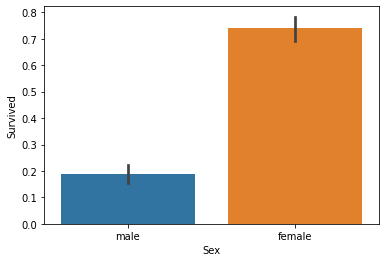

In [18]:
titanic_df.groupby(['Sex','Survived']).count()
sns.barplot(x='Sex',y='Survived',data=titanic_df)

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

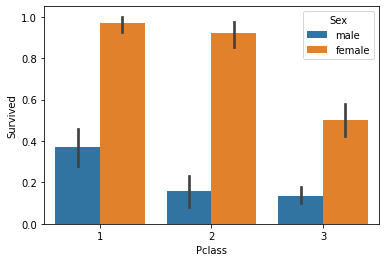

In [19]:
sns.barplot(x='Pclass',y='Survived',hue='Sex',data=titanic_df)

In [20]:
from sklearn import preprocessing

def encode_features(dataDF):
    features=['Cabin','Sex','Embarked']
    for feature in features:
        le = preprocessing.LabelEncoder()
        le = le.fit(dataDF[feature])
        dataDF[feature] = le.transform(dataDF[feature])
        
    return dataDF

titanic_df = encode_features(titanic_df)
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",1,22.0,1,0,A/5 21171,7.2500,7,3
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",0,38.0,1,0,PC 17599,71.2833,2,0
2,3,1,3,"Heikkinen, Miss. Laina",0,26.0,0,0,STON/O2. 3101282,7.9250,7,3
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",0,35.0,1,0,113803,53.1000,2,3
4,5,0,3,"Allen, Mr. William Henry",1,35.0,0,0,373450,8.0500,7,3


In [21]:
from sklearn.preprocessing import LabelEncoder

#null값 처리
def fillna(df):
    df['Age'].fillna(df['Age'].mean(),inplace=True)
    df['Cabin'].fillna('N',inplace=True)
    df['Embarked'].fillna('N',inplace=True)
    df['Fare'].fillna(0,inplace=True)
    return df

#불필요한 feature값 삭제
def drop_features(df):
    df.drop(['PassengerId','Name','Ticket'],axis=1,inplace=True)
    return df

#레이블 인코딩 수행
def format_features(df):
    df['Cabin']=df['Cabin'].str[:1]
    features = ['Cabin','Sex','Embarked']
    for feature in features:
        le = LabelEncoder()
        le = le.fit(df[feature])
        df[feature] = le.transform(df[feature])
    return df

#작성 함수 호출
def transform_features(df):
    df = fillna(df)
    df = drop_features(df)
    df=format_features(df)
    return df

titanic_df = pd.read_csv('./datasets/train.csv')

transform_features(titanic_df).to_csv('ad_train.csv')

In [22]:
#타이타닉 생존자 ML 구현 
## 1.데이터 전처리
y_titanic_df = titanic_df['Survived']
X_titanic_df = titanic_df.drop('Survived',axis=1)

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X_titanic_df,y_titanic_df,
                                                 test_size=0.2,random_state=11)


In [23]:
## 2. 모델 유형별 정확도 측정-> 모델 선정에는 정확도 말고 다양한 요소가 있으나
##    지금은 편의상 정확도만 사용해서 측정하자.
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

#3가지 알고리즘 선정 -> 각각의 알고리즘에 해당하는 객체(class) 생성
df_clf = DecisionTreeClassifier(random_state=11)
rf_clf = RandomForestClassifier(random_state=11)
lr_clf = LogisticRegression()

#개별 알고리즘의 학습
df_clf.fit(X_train,y_train)
df_pred = df_clf.predict(X_test)
print('df의 정확도:{0: .4f}'.format(accuracy_score(y_test,df_pred)))

rf_clf.fit(X_train,y_train)
rf_pred = rf_clf.predict(X_test)
print('rf의 정확도:{0: .4f}'.format(accuracy_score(y_test,rf_pred)))

lr_clf.fit(X_train,y_train)
lr_pred = lr_clf.predict(X_test)
print('lr의 정확도:{0: .4f}'.format(accuracy_score(y_test,lr_pred)))

df의 정확도: 0.7877
rf의 정확도: 0.8547
lr의 정확도: 0.8492


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [24]:
from sklearn.model_selection import KFold

## KFold교차검증을 통한 모델 적합성 평가 함수 

def exec_kfold(clf,folds=5):
    kfold = KFold(n_splits=folds)
    scores=[]
    print('{} 모델 정확도'.format(clf))
    
    for iter_count, (train_index,test_index) in enumerate(kfold.split(X_titanic_df)):
# enumerate(): 지정된 데이터에 대해서 인덱스와 데이터를 묶어서 튜플 형태로 출력하는 함수로
# 여기서는 iter_count,(train_index,test_index)로 enumerate(kfold.split(X_titanic_df))를
# 출력해서 인덱스는 iter_count에 저장되고 데이터는 (train_index,test_index)로 저장된다.
# 여기서 kfold.split(X_titanic_df)는 지정된 데이터를 train과 test로 나눈 값의 인덱스를 
# 리스트로 만들어서 array 형식으로 묶은 데이터로 반환하는 함수인데
# 여기서 개별 array 앞쪽의 리스트는 train데이터의 인덱스, 
# 뒤쪽의 리스트는 test데이터를 의미한다.
## kfold.split의 array 데이터 결과값 확인용
## kfold = KFold()
## for a in kfold.split(X_titanic_df):
##    print(a)
        X_train, X_test = X_titanic_df.values[train_index], X_titanic_df.values[test_index]
        y_train, y_test = y_titanic_df.values[train_index], y_titanic_df.values[test_index] 
        
        clf.fit(X_train,y_train)
        predictions = clf.predict(X_test)
        accuracy = accuracy_score(y_test,predictions)
        scores.append(accuracy)
        print('교차검증{} 정확도: {:.4f}'.format(iter_count, accuracy))
    
    mean_score = np.mean(scores)
    print('평균 정확도: {:.4f}'.format(mean_score))

exec_kfold(dt_clf, folds=5)
exec_kfold(rf_clf,folds=5)
exec_kfold(lr_clf,folds=5)

DecisionTreeClassifier(random_state=156) 모델 정확도
교차검증0 정확도: 0.7542
교차검증1 정확도: 0.7640
교차검증2 정확도: 0.7865
교차검증3 정확도: 0.7584
교차검증4 정확도: 0.8371
평균 정확도: 0.7801
RandomForestClassifier(random_state=11) 모델 정확도
교차검증0 정확도: 0.7933
교차검증1 정확도: 0.8090
교차검증2 정확도: 0.8371
교차검증3 정확도: 0.7753
교차검증4 정확도: 0.8596
평균 정확도: 0.8148
LogisticRegression() 모델 정확도
교차검증0 정확도: 0.8045
교차검증1 정확도: 0.7809
교차검증2 정확도: 0.7753
교차검증3 정확도: 0.7472
교차검증4 정확도: 0.8146
평균 정확도: 0.7845


C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
C:\Users\LG\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/m

In [25]:
# cross_val_score을 이용한 모델 교차 검증의 간략화
from sklearn.model_selection import cross_val_score

scores = cross_val_score(dt_clf, X_titanic_df,y_titanic_df,cv=5)
print(dt_clf,'모델 정확도')
for iter_count,accuracy in enumerate(scores):
    print('교차검증 {} 정확도: {:.4f}'.format(iter_count,accuracy))
print('평균 정확도: {:.4f}'.format(scores.mean()))

DecisionTreeClassifier(random_state=156) 모델 정확도
교차검증 0 정확도: 0.7486
교차검증 1 정확도: 0.7697
교차검증 2 정확도: 0.7978
교차검증 3 정확도: 0.7809
교차검증 4 정확도: 0.8202
평균 정확도: 0.7834


In [26]:
#GridSearchCV를 활용한 모델의 파라미터별 교차 검증의 간략화
from sklearn.model_selection import GridSearchCV

parameters = {'max_depth':[2,3,5,10],
             'min_samples_split':[2,3,5],'min_samples_leaf':[1,5,8]}

grid_dclf = GridSearchCV(dt_clf , param_grid=parameters, cv=5)
grid_dclf.fit(X_train,y_train)

print('GridSearchCV 최적 하이퍼 파라미터:',grid_dclf.best_params_)
print('GridSearchCV 최고 정확도: {:.4f}'.format(grid_dclf.best_score_))
best_dclf = grid_dclf.best_estimator_

dpredictions = best_dclf.predict(X_test)
accuracy = accuracy_score(y_test,dpredictions)
print('테스트 세트에서 DecisionTreeClassifier 정확도:{:.4f}'.format(accuracy))

GridSearchCV 최적 하이퍼 파라미터: {'max_depth': 3, 'min_samples_leaf': 5, 'min_samples_split': 2}
GridSearchCV 최고 정확도: 0.7992
테스트 세트에서 DecisionTreeClassifier 정확도:0.8715


In [27]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler, MinMaxScaler

X= titanic_df.drop('Survived',axis=1)
y = titanic_df['Survived']

X_train, X_test, y_test, y_train = train_test_split(X,y,test_size=0.2,random_state=11)

pipeline= Pipeline([('scaler',StandardScaler()),('rfc',DecisionTreeClassifier())])

pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_test)
    
print(accuracy_score(y_test,y_pred))
print(precision_score(y_test,y_pred))
print(recall_score(y_test,y_pred))
GridSearchCV

ValueError: Number of labels=179 does not match number of samples=712